In [ ]:
#Problem_1

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.regularizers import l2
import numpy as np
import os
import matplotlib.pyplot as plt

%matplotlib inline
import keras

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [ ]:
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_4 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               4194816   
_________________________________________________________________
activation_5 (Activation)    (None, 512)              

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [ ]:
batch_size = 32
epochs = 10

In [ ]:
history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True,
              callbacks=[#WandbCallback(data_type="image", labels=class_names), 
              TensorBoard(log_dir='./log1/', histogram_freq=1)]
            )

Epoch 1/10
1563/1563 [==============================] - 98s 63ms/step - loss: 1.3280 - accuracy: 0.5275 - val_loss: 1.1832 - val_accuracy: 0.5722
Epoch 2/10
1563/1563 [==============================] - 96s 61ms/step - loss: 1.1915 - accuracy: 0.5771 - val_loss: 1.0841 - val_accuracy: 0.6177
Epoch 3/10
1563/1563 [==============================] - 97s 62ms/step - loss: 1.0992 - accuracy: 0.6092 - val_loss: 1.0182 - val_accuracy: 0.6395
Epoch 4/10
1563/1563 [==============================] - 96s 61ms/step - loss: 1.0329 - accuracy: 0.6345 - val_loss: 0.9882 - val_accuracy: 0.6520
Epoch 5/10
1563/1563 [==============================] - 96s 61ms/step - loss: 0.9803 - accuracy: 0.6524 - val_loss: 0.9871 - val_accuracy: 0.6539
Epoch 6/10
1563/1563 [==============================] - 100s 64ms/step - loss: 0.9375 - accuracy: 0.6678 - val_loss: 0.9610 - val_accuracy: 0.6624
Epoch 7/10
1563/1563 [==============================] - 99s 63ms/step - loss: 0.8871 - accuracy: 0.6826 - val_loss: 0.9693 

In [ ]:
%tensorboard — logdir logs

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


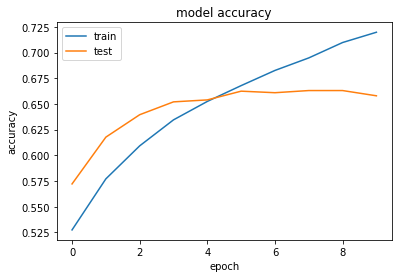

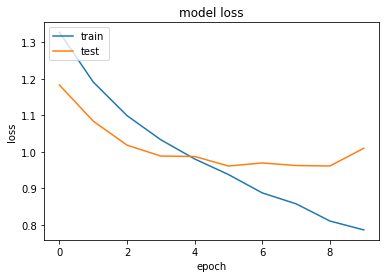

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:
x= tf.keras.Input ( shape =( 32, 32, 3 ) )

conv = Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:])(x)

max_statistic= MaxPooling2D( pool_size =4 ,padding ='same')(conv)
range_statistic = tf.math.negative ( conv )
range_statistic = MaxPooling2D ( pool_size =4 ,padding ='same') (range_statistic )
range_statistic = tf . math . negative ( range_statistic )
range_statisti = tf . math . subtract ( max_statistic , range_statistic )
concatted = tf . keras . layers . Concatenate () ([ max_statistic , range_statisti ])
features = Flatten () (concatted)
features = tf.keras.layers.ReLU () ( features )
dense = Dense ( units =256 , activation ='relu') ( features )
predictions = Dense (units =10 ,activation ='softmax',name ='output') ( dense )
model =tf.keras.Model ( inputs =x ,outputs = predictions )

In [ ]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_20 (Conv2D)              (None, 32, 32, 32)   896         input_14[0][0]                   
__________________________________________________________________________________________________
tf.math.negative_26 (TFOpLambda (None, 32, 32, 32)   0           conv2d_20[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_29 (MaxPooling2D) (None, 8, 8, 32)     0           tf.math.negative_26[0][0]        
____________________________________________________________________________________________

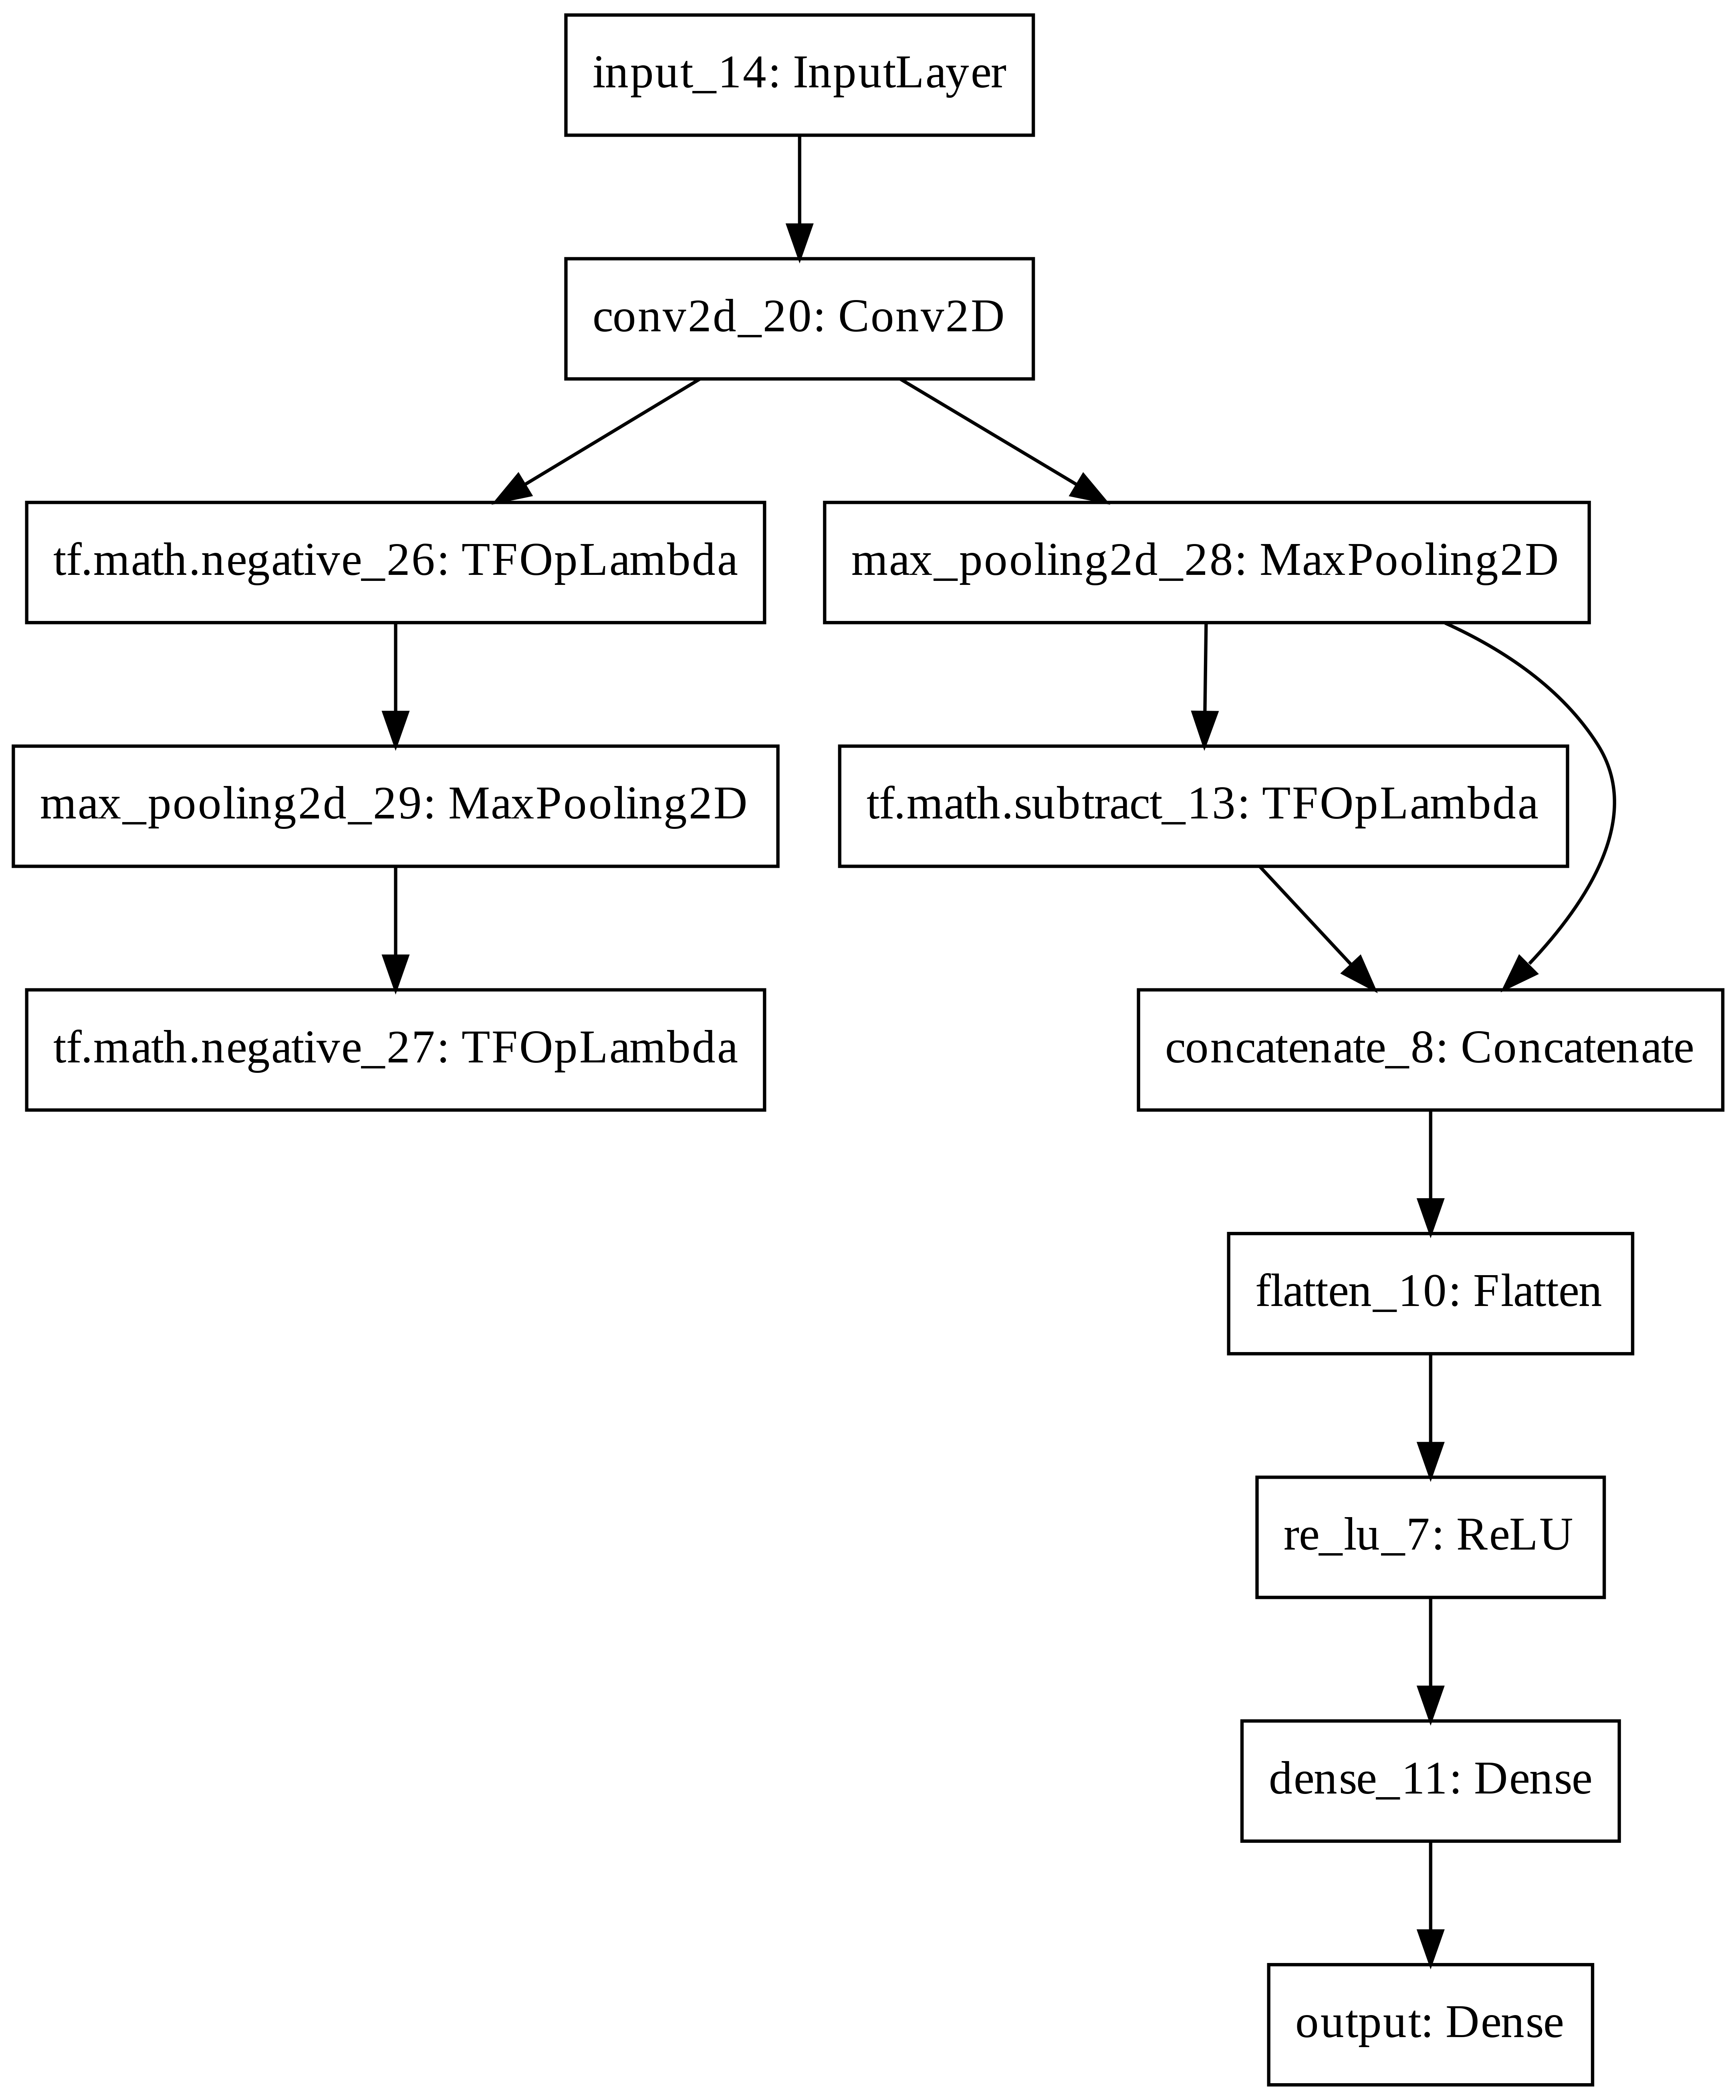

In [ ]:
tf . keras . utils . plot_model ( model ,show_shapes =False ,dpi =600)

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [ ]:
batch_size = 32
epochs = 10

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 10, 10)

In [ ]:
tf.config.run_functions_eagerly(True)
histor = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test, y_test),shuffle=True,verbose=1)

In [ ]:
histor = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test, y_test),shuffle=True,verbose=1)

Epoch 1/10
   1/1563 [..............................] - ETA: 3:06 - loss: 2.4950 - accuracy: 0.1875

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4212: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


1563/1563 [==============================] - 112s 71ms/step - loss: 1.3711 - accuracy: 0.5122 - val_loss: 1.1287 - val_accuracy: 0.6027
Epoch 2/10
1563/1563 [==============================] - 107s 69ms/step - loss: 1.0627 - accuracy: 0.6272 - val_loss: 0.9993 - val_accuracy: 0.6508
Epoch 3/10
1563/1563 [==============================] - 108s 69ms/step - loss: 0.9556 - accuracy: 0.6681 - val_loss: 0.9812 - val_accuracy: 0.6597
Epoch 4/10
1563/1563 [==============================] - 103s 66ms/step - loss: 0.8868 - accuracy: 0.6897 - val_loss: 0.9519 - val_accuracy: 0.6696
Epoch 5/10
1563/1563 [==============================] - 107s 68ms/step - loss: 0.8342 - accuracy: 0.7084 - val_loss: 0.8900 - val_accuracy: 0.6918
Epoch 6/10
1563/1563 [==============================] - 108s 69ms/step - loss: 0.7880 - accuracy: 0.7256 - val_loss: 0.8995 - val_accuracy: 0.6883
Epoch 7/10
1563/1563 [==============================] - 104s 66ms/step - loss: 0.7461 - accuracy: 0.7391 - val_loss: 0.9519 - val

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


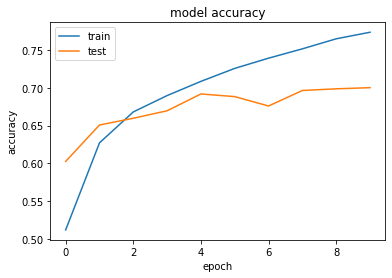

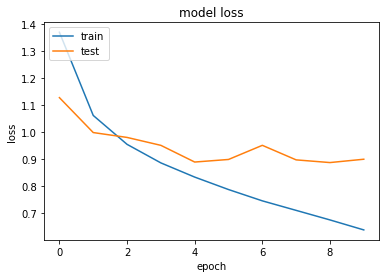

In [ ]:
#list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(histor.history['accuracy'])
plt.plot(histor.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(histor.history['loss'])
plt.plot(histor.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

On analysis, of the both the models, I come to know that from the architecture increases  the accuarcy increases and loss function decreases. 


In the normal model, I come to know that the loss fucntion is gradually decreases and accuarcy is increases by substance 


In, the two max pooling layer model the loss functipn decreases rapidly and accuarcy increases immediately.

So, I would like to conclude that the architecture and problem is depends on each other then the best results will possible. 
